# Handling Missing Values, Outliers, and Inconsistencies

## Objective 
Learn how to handle missing values, outliers, and inconsistencies in data.

## Pre-requisites: 

Please make sure you have the following libraries installed:
- Python Environment: You should have a Python environment set up on your system. If you don't have Python installed, you can download it from the [official Python website](https://www.python.org/downloads/). We recommend downloading Python 3.8 or above.
- Jupyter Notebook: This code is intended to be run in a Jupyter Notebook environment. Make sure you have [Jupyter Notebook installed](https://jupyter.org/install).
- Library Installation: You need to install the required libraries:
    - pandas
    - numpy
    - matplotlib
 
To install, run the following commands:
"**!pip3 install pandas numpy matplotlib seaborn**"

In [6]:
# Install necessary libraries
!pip3 install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset
We will be using the Titanic dataset which is publicly available for research purposes.
This dataset has 414 columns and the following columns:

- **PassengerId**: A unique identifier for each passenger.
- **Survived**: A binary variable indicating whether the passenger survived (1) or did not survive (0) the sinking.
- **Pclass**: The passenger class, which represents socio-economic status (1st, 2nd, or 3rd class).
- **Name**: The passenger's name.
- **Sex**: The gender of the passenger.
- **Age**: The age of the passenger.
- **SibSp**: The number of siblings or spouses aboard.
- **Parch**: The number of parents or children aboard.
- **Ticket**: The passenger's ticket number.
- **Fare**: The fare paid for the ticket.
- **Cabin**: The cabin number.
- **Embarked**: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [8]:
titanic = pd.read_csv('./titatnic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Handling Missing Values

Let's begin with missing values. Missing data can disrupt your analysis, so it's vital to address them properly.

In [9]:
# Check for missing values
missing_values = titanic.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


- In this example, we loaded the titanic data frame and checked for missing values using isnull() and sum().
- We found that the column:
    - **Age** has 86 missing values
    - **Cabin** has 327 missing values
    - **Fare** has 1 missing value
- Once you've identified missing values using isnull() and sum(), we have several options for handling them:
    - Data Removal:
        - Dropping Rows / Columns: You can remove rows (data points) that contain missing values. This is suitable when only a small percentage of rows have missing data. If an entire column has a significant number of missing values and is not critical for your analysis, you can drop the entire column.

In [10]:
titanic.dropna(inplace=True)  # Drops rows with missing values
titanic.drop('Cabin', axis=1, inplace=True)  # Drops a column with missing values
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,S


- Data Imputation: You can fill in missing values with the mean, median, or mode of the respective column. This is useful when missing values are missing at random and don't introduce bias.

In [16]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)  # Fill with mean
missing_values = titanic.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


- Forward or Backward Fill: For time series data, you can use forward fill (ffill) or backward fill (bfill) to propagate the last known value.
- Interpolation: Interpolation methods estimate missing values based on neighboring values. For instance, linear interpolation estimates values based on a linear relationship.
- Creating Indicator Variables: You can create binary indicator variables (0 or 1) to represent whether a value was missing or not. This allows you to capture the information about missingness. However, there are situations where this approach may not be a good idea or may not provide meaningful results.
    - Imagine you have a dataset of employees, and one of the features is "Salary." In this dataset, some employees have missing salary values. Creating binary variables (e.g., 0 for missing salary, 1 for known salary) to replace missing values for the "Salary" feature may not be a suitable approach. It could give the impression that employees with missing salaries have a fixed salary of 0, which is incorrect and misleading. In this case, a better approach might be to use an imputation method. So, creating binary variables may not capture the nuance of the missing salary data accurately.



## Addressing Outliers
These extreme values can skew your analyses and visualizations significantly.

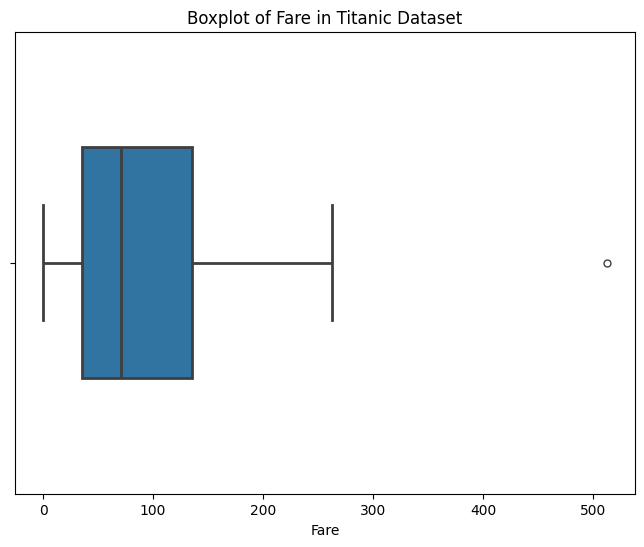

In [15]:
# Create a boxplot to visualize outliers for the "Age" column
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic, x='Fare', orient='h', width=0.5, linewidth=2, fliersize=5, showfliers=True)
plt.title("Boxplot of Fare in Titanic Dataset")
plt.xlabel("Fare")
plt.show()

- In this example, visualize the **Fare** column using a boxplot. 
- We found that most passengers paid a maximum of approximately 300 USD for their ticket, except one passenger who paid over 500 USD.
- Identifying and handling outliers is crucial because they can significantly impact your analysis results. Some of the ways to deal with them are
    - Data Removal: If the outliers are clear errors or anomalies that don't represent genuine data, you can choose to remove them.
    - Be cautious when removing outliers, as it can lead to a loss of potentially valuable information.
    - Data Transformation: Apply data transformations to reduce the impact of outliers without removing them. Common transformations include taking the logarithm, square root, or Box-Cox transformation.
    - Binning: Divide your data into bins or categories. Outliers can be placed in specific bins to prevent them from affecting the overall analysis. This is commonly used in histograms and when dealing with continuous data.
    - Winsorization: Winsorization involves capping or limiting extreme values to a specified percentile. You set a threshold beyond which values are replaced with the nearest value at that threshold. For example, you can set a threshold at the 95th percentile and replace values above it with the 95th percentile value.
    - Z-Score or Standardization: Calculate the z-score of your data points. The z-score measures how many standard deviations a data point is away from the mean. Set a threshold for the z-score (e.g., z > 3 or z < -3) and consider data points beyond this threshold as outliers. You can choose to remove or transform these outliers based on the z-score.
    - Statistical Methods: Use statistical methods that are less sensitive to outliers, such as the median instead of the mean for central tendency or the interquartile range (IQR) instead of the standard deviation for dispersion. Robust regression techniques like the Huber loss function can also be employed when building predictive models.
    - Clustering: Cluster analysis can help you identify and separate outliers from the rest of the data. Outliers might form separate clusters, making them easier to detect and manage.

## Managing Inconsistencies
These can be errors or discrepancies in your data that need correction.

In [18]:
# Create a data frame with inconsistent city names
data = {'City': ['New York', 'Los Angeles', 'San Fran', 'Chicago', 'NYC']}
df = pd.DataFrame(data)
df.head()

,City
0,New York
1,Los Angeles
2,San Fran
3,Chicago
4,NYC


In [19]:
# Replace inconsistent city names
city_mapping = {'NYC': 'New York', 'San Fran': 'San Francisco'}
df['City'] = df['City'].replace(city_mapping)

print("Fixed City Names:\n", df['City'])

Fixed City Names:
 0         New York
1      Los Angeles
2    San Francisco
3          Chicago
4         New York
Name: City, dtype: object


- In this example, we had inconsistent city names, and we fixed them using a mapping dictionary.
- Inconsistencies can lead to incorrect analysis results, so it's essential to identify and rectify them to ensure data consistency and accuracy. Inconsistencies can arise from various sources, including typos, formatting issues, and errors. Here are several ways to address inconsistencies in your data:
    - Data Standardization: Standardize data by ensuring consistent units, formats, and conventions. For example, if you have date data in various formats (e.g., "MM/DD/YYYY" and "YYYY-MM-DD"), convert them to a common

In [26]:
from dateutil.parser import parse

# Sample DataFrame with inconsistent date formats
data = {'Dates': ['2021-09-15', '15/09/2021', '2021-09-20', '09/20/2021']}
df = pd.DataFrame(data)
df.head()

,Dates
0,2021-09-15
1,15/09/2021
2,2021-09-20
3,09/20/2021


In [27]:
# Use dateutil to parse the dates and format them consistently
df['Dates'] = df['Dates'].apply(lambda x: parse(x).strftime('%Y-%m-%d'))

# Display the DataFrame
df.head()

,Dates
0,2021-09-15
1,2021-09-15
2,2021-09-20
3,2021-09-20


- Data transformation: Apply data transformations to correct inconsistencies. For instance, if you have inconsistent units (e.g., "meters" and "feet"), you can convert them to a common unit.
- Data validation rules: Implement data validation rules to prevent inconsistencies from being introduced in the first place. For instance, restrict user input for specific fields to a predefined list of options.
- Text cleaning: Remove leading and trailing whitespaces from text data to prevent inconsistencies caused by extra spaces. Use regular expressions to clean and standardize text data, such as removing special characters or punctuation.
- Data profiling and Exploratory Data Analysis (EDA): Conduct data profiling and exploratory data analysis to identify inconsistencies visually. Data visualization tools can help you spot outliers or irregular patterns.
- Pattern recognition: Use pattern recognition techniques to identify inconsistencies or anomalies in the data. For example, you can use regular expressions to validate email addresses, phone numbers, or postal codes.
- Data governance policies: Establish data governance policies and guidelines within your organization to ensure data consistency and quality are maintained throughout the data lifecycle.

Remember that the choice of method for processing values should depend on the nature of the data, the problem you're trying to solve, and the potential impact on your analysis. It's often a good practice to document the steps you've taken to handle missing values to ensure transparency in your analysis.

### Summary

We discussed the important aspects of data cleaning and preprocessing in Python, focusing on handling missing values, outliers, and inconsistencies. The key points are:

**Handling missing values**:

- Missing data can disrupt your analysis, so addressing them is crucial.
- Methods for handling missing values include data removal, data imputation (using mean, median, or mode), forward or backward fill for time series data, interpolation, and creating indicator variables (0 or 1) to represent missing values.
- The choice of method depends on the nature of the data and the problem you're trying to solve.

**Addressing outliers**:

- Outliers are extreme values that can skew analysis results and visualizations.
- Methods for dealing with outliers include data removal, data transformation (e.g., logarithm, square root), binning, Winsorization, z-score or standardization, statistical methods (e.g., median, IQR), clustering, and robust regression techniques.
- Caution should be exercised when removing outliers to avoid loss of valuable information.

**Managing Inconsistencies**:

- Inconsistencies in data can lead to incorrect analysis results.
- Methods for addressing inconsistencies include data standardization, data transformation (e.g., converting units), data validation rules, text cleaning, data profiling and exploratory data analysis (EDA), pattern recognition, and establishing data governance policies.
- The choice of method for correcting inconsistencies depends on the specific data quality issues and their nature.